# Data Processor

In [10]:
import utils
import earthpy.plot as ep
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# TODO: Changes these values for parameters on a database.
BASE_DIR = '/home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData'
bands =  ['B4','B3','B2']

# Dict of the images.
images = utils.load_landsat_image(BASE_DIR, bands)

Opening file /home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200615T165849_20200615T171154_T15TXG_15Jun2020_B4.tif
Opening file /home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200615T165849_20200615T171154_T15TXG_15Jun2020_B3.tif
Opening file /home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200615T165849_20200615T171154_T15TXG_15Jun2020_B2.tif
Opening file /home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200508T164901_20200508T165551_T15TXG_08May2020_B4.tif
Opening file /home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200508T164901_20200508T165551_T15TXG_08May2020_B3.tif
Opening file /home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200508T164901_20200508T165551_T15TXG_08May2020_B2.tif
Opening file /home/mauricio/code/Plant-Growth-Cycle-

In [12]:
# Images dicitionary.
print(f'The total length of the images dictionary is {len(images)}')

The total length of the images dictionary is 34


In [13]:
# Array with the ID of the images.
keys_lst = list(images.keys())

/home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/utils.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=figsize)


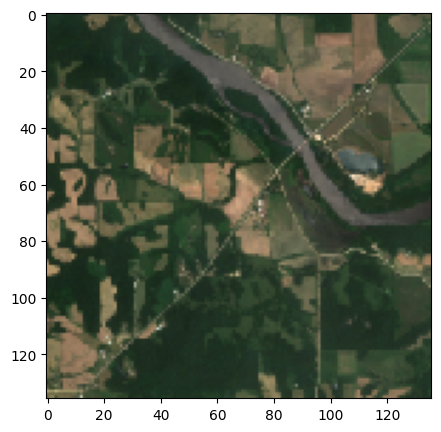

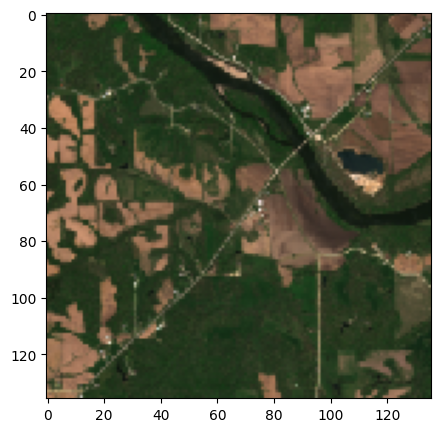

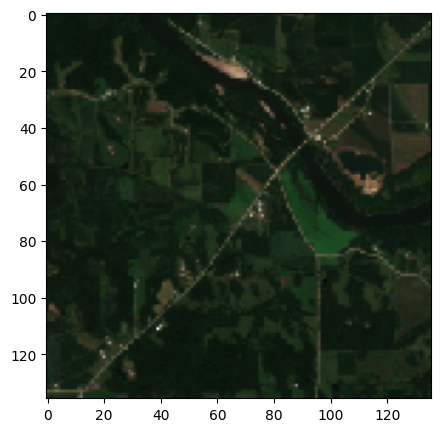

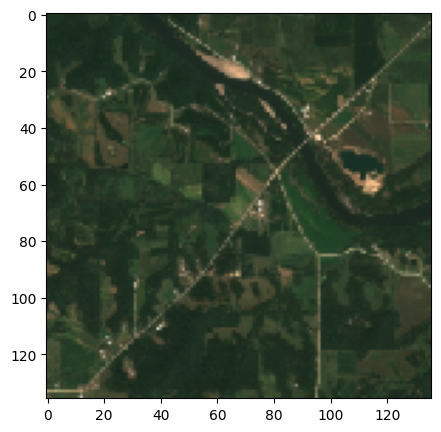

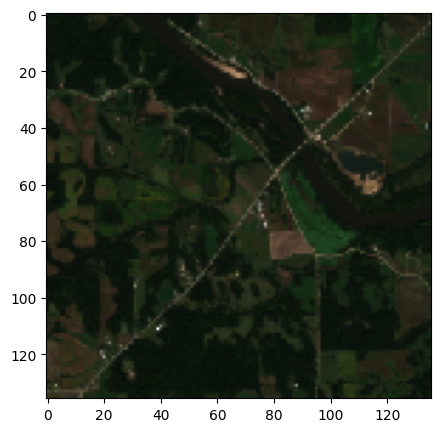

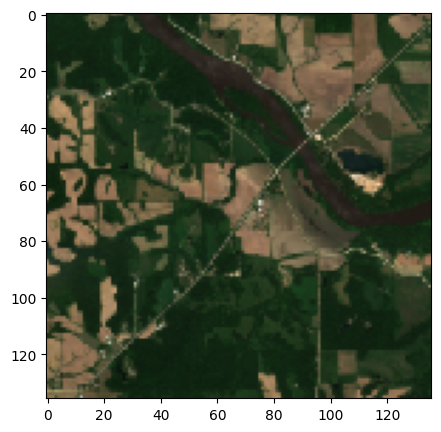

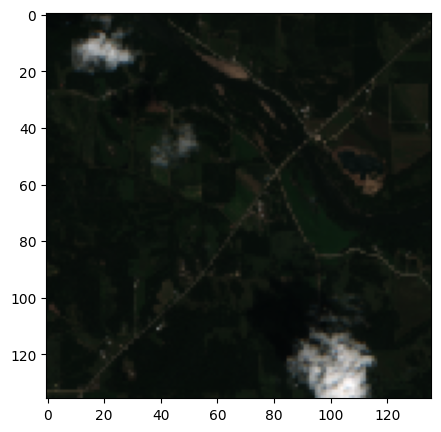

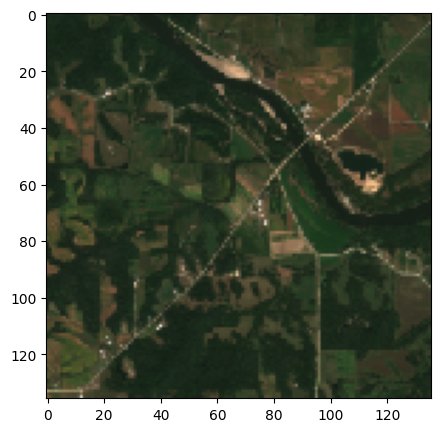

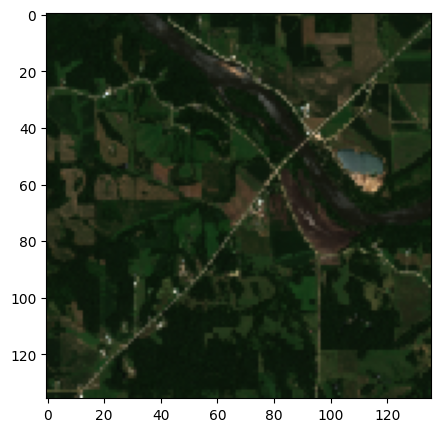

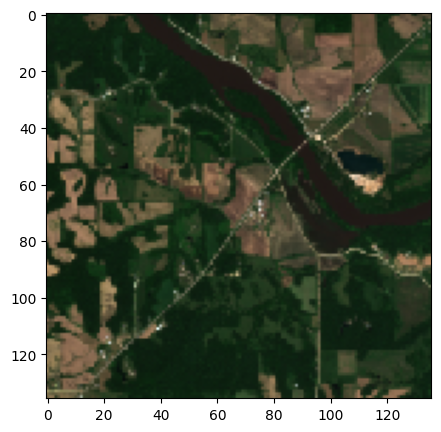

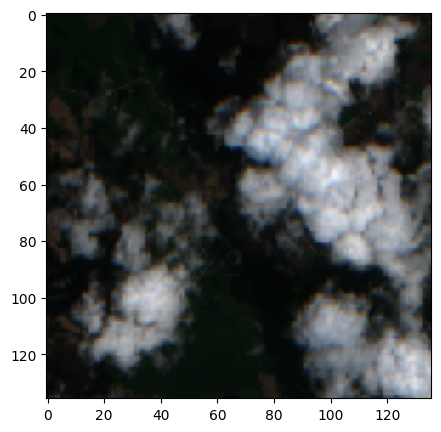

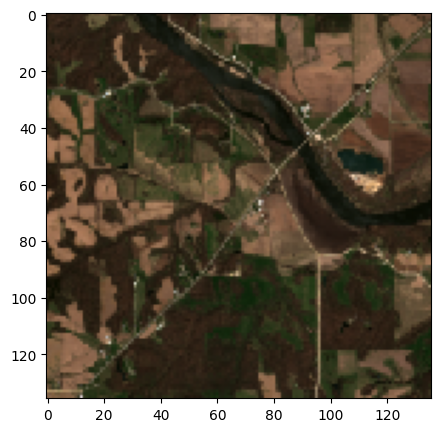

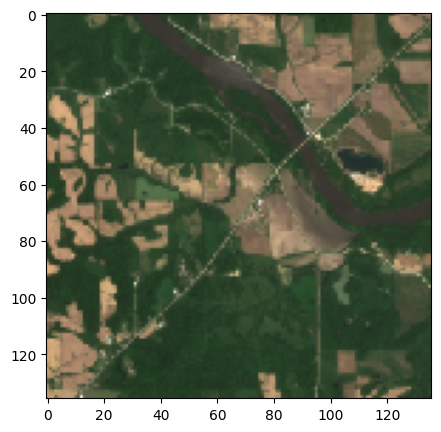

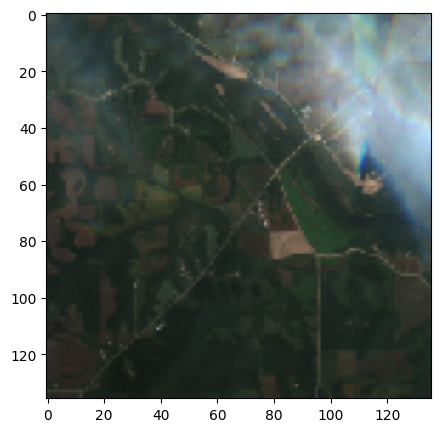

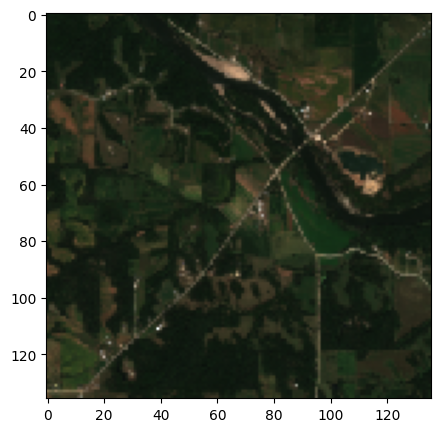

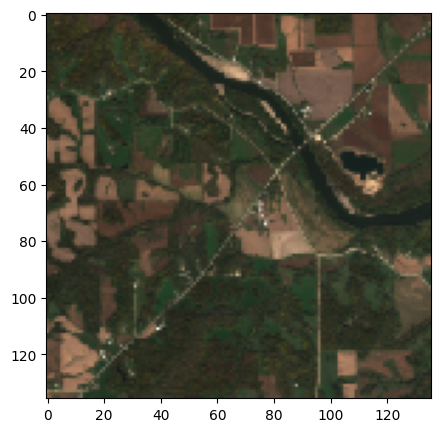

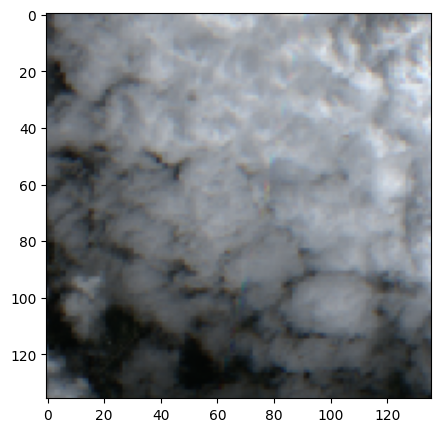

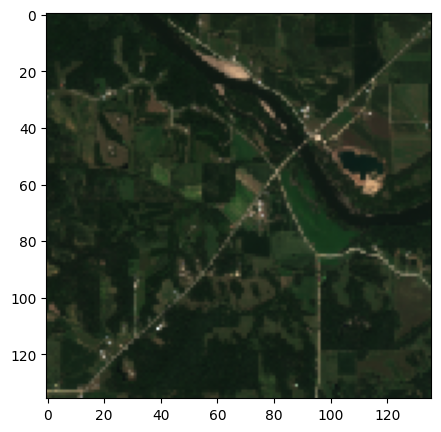

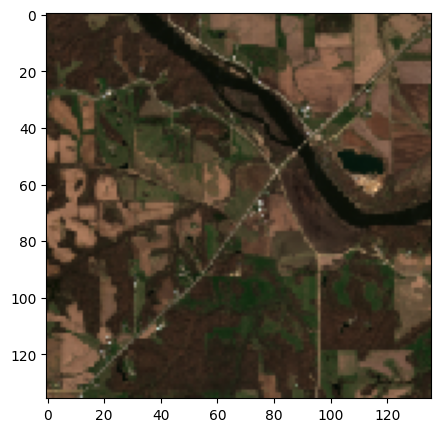

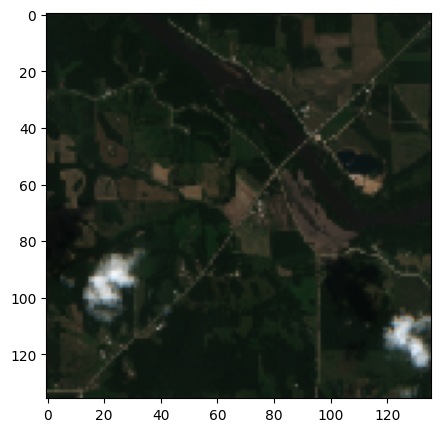

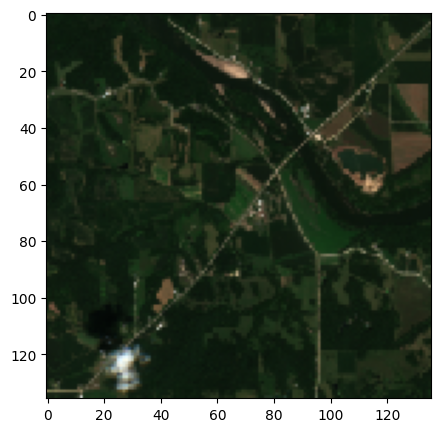

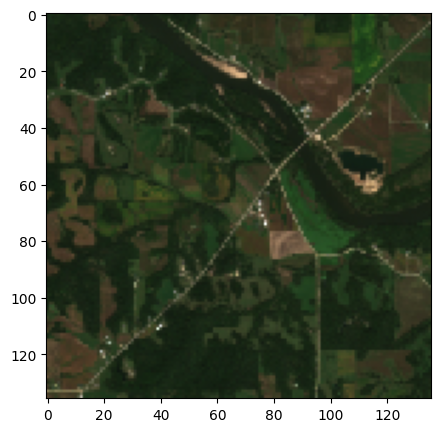

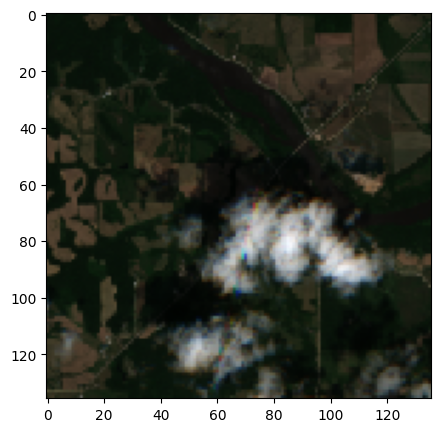

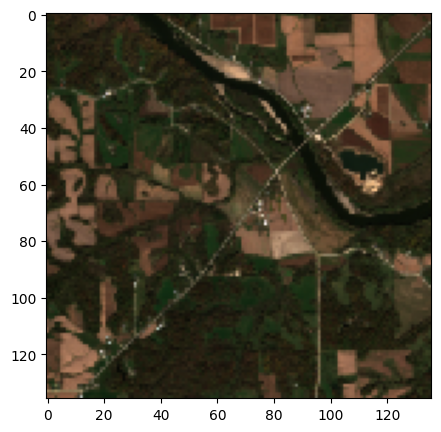

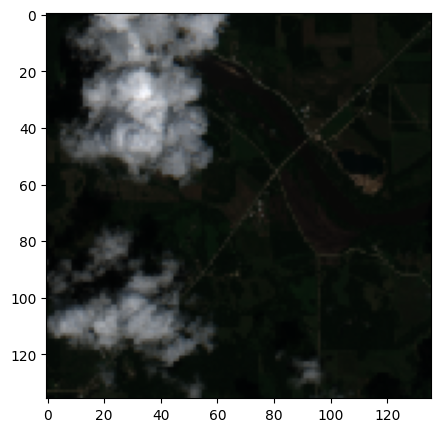

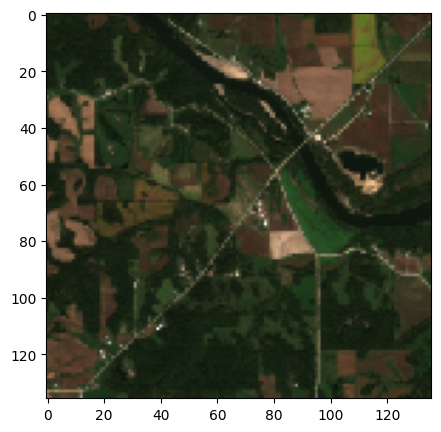

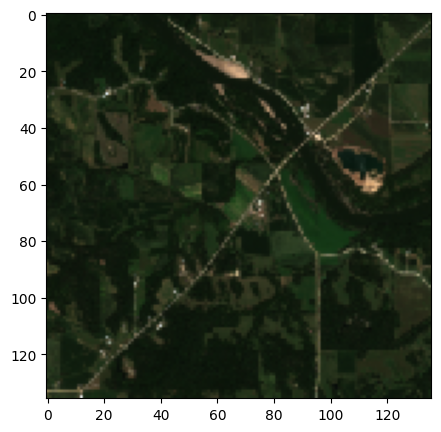

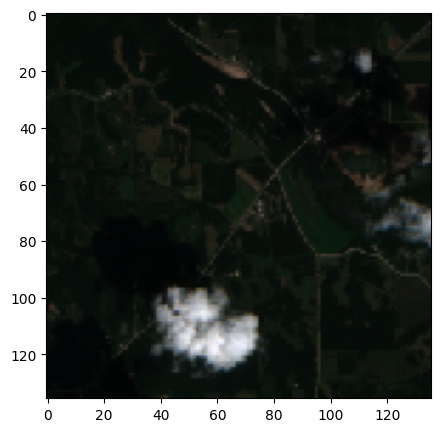

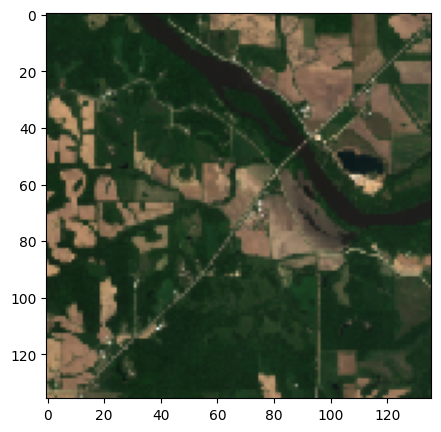

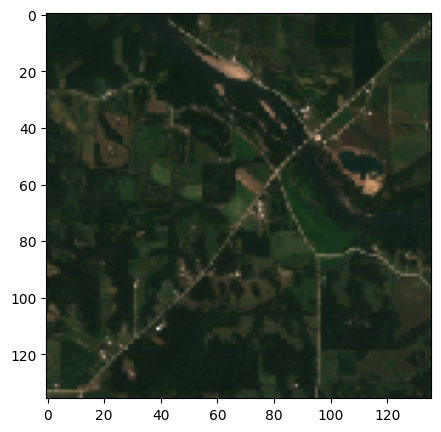

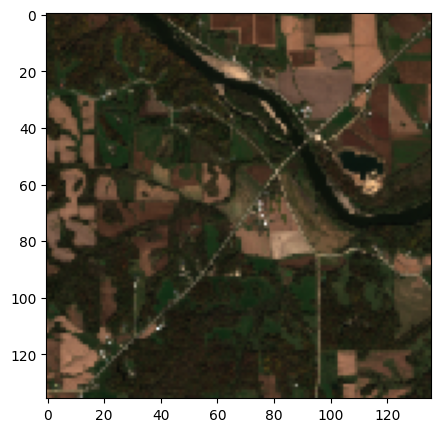

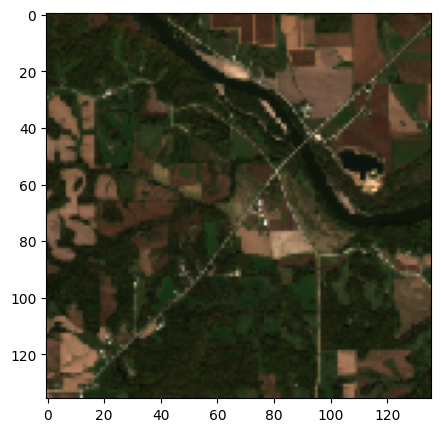

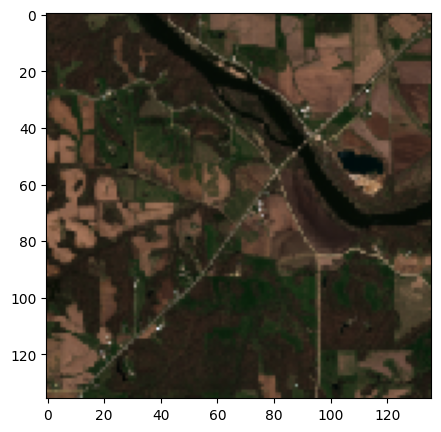

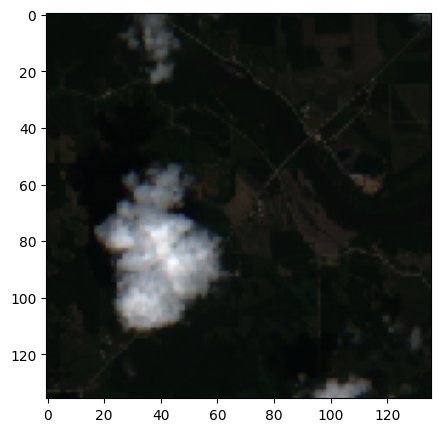

In [14]:
for key in keys_lst:
    utils.display_rgb(images[key])

array([[[0.03323342, 0.07389548, 0.04014075],
        [0.03753421, 0.0811938 , 0.04287762],
        [0.03440636, 0.07936922, 0.04235631],
        ...,
        [0.13006647, 0.13997133, 0.09357487],
        [0.13345497, 0.14570572, 0.09396585],
        [0.1230288 , 0.14088362, 0.08731917]],

       [[0.03323342, 0.07558973, 0.04144402],
        [0.03427603, 0.08002085, 0.04235631],
        [0.03323342, 0.06946436, 0.03792519],
        ...,
        [0.06594552, 0.09552978, 0.05369477],
        [0.1139059 , 0.13123941, 0.08393067],
        [0.11872801, 0.13788609, 0.08823146]],

       [[0.03114818, 0.07220123, 0.03766454],
        [0.03388505, 0.07702333, 0.04066206],
        [0.0355793 , 0.07936922, 0.04118337],
        ...,
        [0.08484296, 0.11247231, 0.06646683],
        [0.06359964, 0.10074286, 0.05434641],
        [0.0706373 , 0.12459273, 0.06672749]],

       ...,

       [[0.32842435, 0.31904079, 0.21868891],
        [0.28007298, 0.27785742, 0.1845432 ],
        [0.26495504, 0

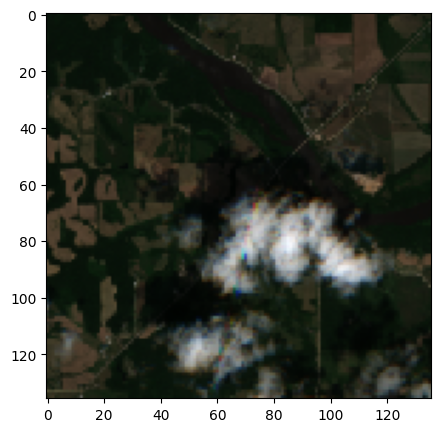

In [15]:
# Select just one image.
image = images[keys_lst[0]]
image = images['20200617T16490120200617T170013T15TXG17Jun2020']
# Display the image.
utils.display_rgb(image)

In [16]:
image

{'B4': array([[ 255,  288,  264, ...,  998, 1024,  944],
        [ 255,  263,  255, ...,  506,  874,  911],
        [ 239,  260,  273, ...,  651,  488,  542],
        ...,
        [2520, 2149, 2033, ..., 2388, 2765, 3104],
        [1443, 1531, 1572, ..., 1596, 1995, 2926],
        [1222, 1659, 1848, ...,  604, 1078, 2758]], dtype=int32),
 'B3': array([[ 567,  623,  609, ..., 1074, 1118, 1081],
        [ 580,  614,  533, ...,  733, 1007, 1058],
        [ 554,  591,  609, ...,  863,  773,  956],
        ...,
        [2448, 2132, 2035, ..., 2741, 3064, 3258],
        [1448, 1501, 1432, ..., 2321, 2700, 3165],
        [1298, 1554, 1664, ...,  973, 1541, 3132]], dtype=int32),
 'B2': array([[ 308,  329,  325, ...,  718,  721,  670],
        [ 318,  325,  291, ...,  412,  644,  677],
        [ 289,  312,  316, ...,  510,  417,  512],
        ...,
        [1678, 1416, 1397, ..., 2796, 2936, 2930],
        [ 902, 1017,  942, ..., 2453, 2825, 3118],
        [ 810, 1034, 1146, ..., 1032, 1565, 29

In [17]:
# Traspose as np.stack
img_stack = np.stack([image['B4'], image['B3'], image['B2']], axis=0)

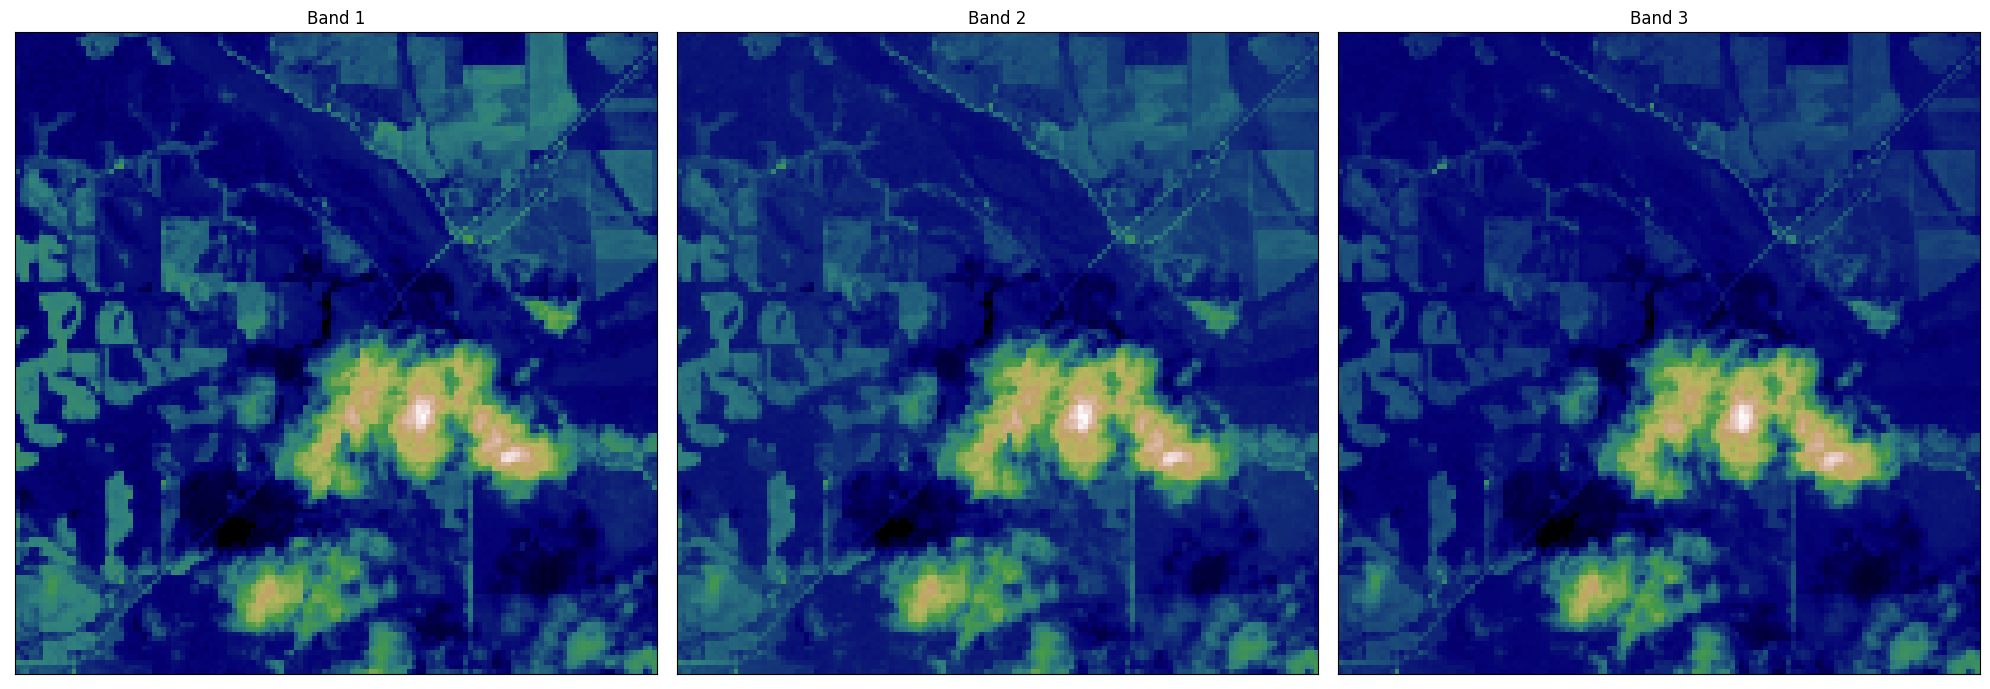

In [18]:
ep.plot_bands(img_stack, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 3, 
              cbar = False)
plt.show()

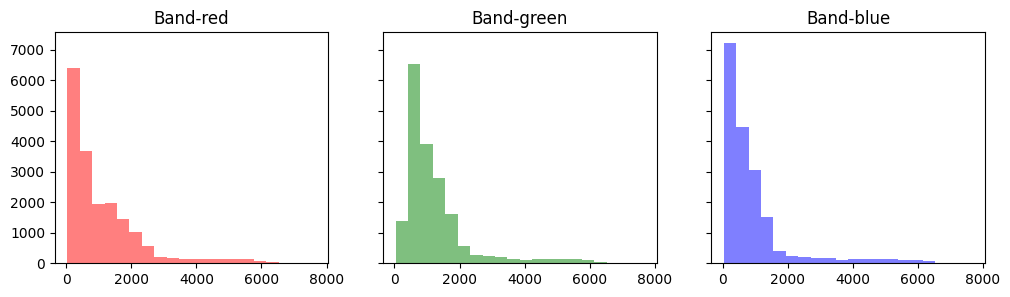

In [19]:
colors = ['red', 'green', 'blue']

ep.hist(img_stack, 
        colors = colors,
        title=[f'Band-{i}' for i in colors], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 3))

plt.show()

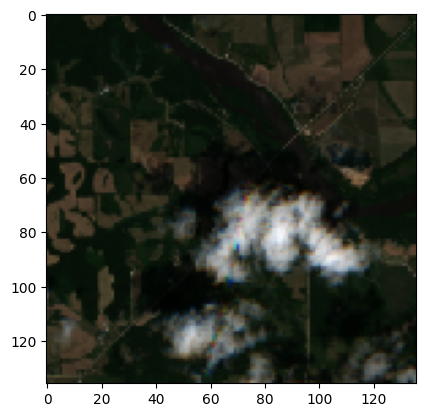

In [20]:
# Scale the data to [0, 255] to show as an RGB image.
eight_bit_image = utils.convert_to_eight_bits(image)
plt.imshow(eight_bit_image)
plt.show()